<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(2_4)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,80.319418,-441.451646,-351.132228,105.701080,-456.833308
1,0.0,1.0,28.078907,42.056281,80.135187,48.228512,31.906676
2,0.0,2.0,53.683431,28.768143,92.451574,76.397412,16.054162
3,0.0,3.0,27.797474,45.948424,83.745898,47.918892,35.827005
4,0.0,4.0,80.239811,-106.061991,-15.822180,105.613501,-121.435681
...,...,...,...,...,...,...,...
119995,999.0,115.0,30.238052,29.301200,69.539252,32.588172,36.951080
119996,999.0,116.0,53.208478,-57.902433,5.306045,60.481518,-55.175473
119997,999.0,117.0,46.757868,32.531923,89.289791,52.648442,36.641349
119998,999.0,118.0,64.932848,-120.676898,-45.744050,74.718603,-120.462653


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,80.319418,-441.451646,-351.132228,105.701080,-456.833308
1,0.0,1.0,28.078907,42.056281,80.135187,48.228512,31.906676
2,0.0,2.0,53.683431,28.768143,92.451574,76.397412,16.054162
3,0.0,3.0,27.797474,45.948424,83.745898,47.918892,35.827005
4,0.0,4.0,80.239811,-106.061991,-15.822180,105.613501,-121.435681
...,...,...,...,...,...,...,...
119995,999.0,115.0,30.238052,29.301200,69.539252,32.588172,36.951080
119996,999.0,116.0,53.208478,-57.902433,5.306045,60.481518,-55.175473
119997,999.0,117.0,46.757868,32.531923,89.289791,52.648442,36.641349
119998,999.0,118.0,64.932848,-120.676898,-45.744050,74.718603,-120.462653


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    80.319418 -441.451646 -351.132228  105.701080 -456.833308
      1.0    28.078907   42.056281   80.135187   48.228512   31.906676
      2.0    53.683431   28.768143   92.451574   76.397412   16.054162
      3.0    27.797474   45.948424   83.745898   47.918892   35.827005
      4.0    80.239811 -106.061991  -15.822180  105.613501 -121.435681
...                ...         ...         ...         ...         ...
999.0 115.0  30.238052   29.301200   69.539252   32.588172   36.951080
      116.0  53.208478  -57.902433    5.306045   60.481518  -55.175473
      117.0  46.757868   32.531923   89.289791   52.648442   36.641349
      118.0  64.932848 -120.676898  -45.744050   74.718603 -120.462653
      119.0  88.765273 -247.893702 -149.128429  103.658688 -252.787117

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    80.319418 -441.451646 -351.132228  105.701080 -456.833308
      1.0    28.078907   42.056281   80.135187   48.228512   31.906676
      2.0    53.683431   28.768143   92.451574   76.397412   16.054162
      3.0    27.797474   45.948424   83.745898   47.918892   35.827005
      4.0    80.239811 -106.061991  -15.822180  105.613501 -121.435681
...                ...         ...         ...         ...         ...
999.0 115.0  30.238052   29.301200   69.539252   32.588172   36.951080
      116.0  53.208478  -57.902433    5.306045   60.481518  -55.175473
      117.0  46.757868   32.531923   89.289791   52.648442   36.641349
      118.0  64.932848 -120.676898  -45.744050   74.718603 -120.462653
      119.0  88.765273 -247.893702 -149.128429  103.658688 -252.787117

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,80.319418,-441.451646,-351.132228,105.701080,-456.833308
1,0.0,1.0,28.078907,42.056281,80.135187,48.228512,31.906676
2,0.0,2.0,53.683431,28.768143,92.451574,76.397412,16.054162
3,0.0,3.0,27.797474,45.948424,83.745898,47.918892,35.827005
4,0.0,4.0,80.239811,-106.061991,-15.822180,105.613501,-121.435681
...,...,...,...,...,...,...,...
119995,999.0,115.0,30.238052,29.301200,69.539252,32.588172,36.951080
119996,999.0,116.0,53.208478,-57.902433,5.306045,60.481518,-55.175473
119997,999.0,117.0,46.757868,32.531923,89.289791,52.648442,36.641349
119998,999.0,118.0,64.932848,-120.676898,-45.744050,74.718603,-120.462653


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1           e           Y       y_hat       e_hat
rep   index                                                           
0.0   0.0    80.319418 -441.451646 -351.132228  105.701080 -456.833308
      1.0    28.078907   42.056281   80.135187   48.228512   31.906676
      2.0    53.683431   28.768143   92.451574   76.397412   16.054162
      3.0    27.797474   45.948424   83.745898   47.918892   35.827005
      4.0    80.239811 -106.061991  -15.822180  105.613501 -121.435681
...                ...         ...         ...         ...         ...
999.0 115.0  30.238052   29.301200   69.539252   32.588172   36.951080
      116.0  53.208478  -57.902433    5.306045   60.481518  -55.175473
      117.0  46.757868   32.531923   89.289791   52.648442   36.641349
      118.0  64.932848 -120.676898  -45.744050   74.718603 -120.462653
      119.0  88.765273 -247.893702 -149.128429  103.658688 -252.787117

[120000 rows x 5 columns]

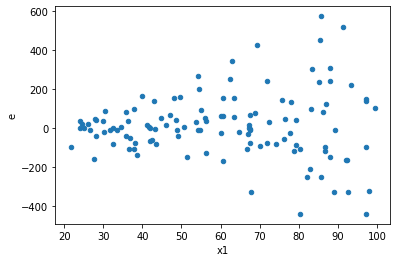

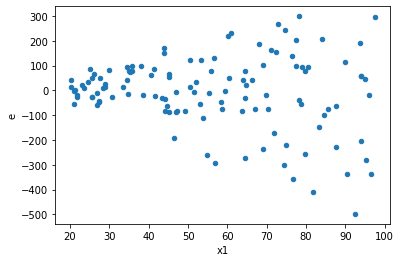

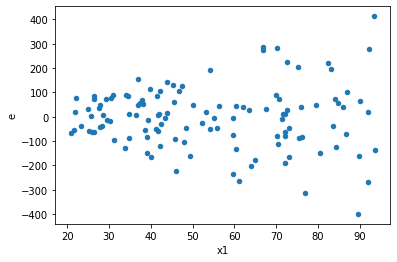

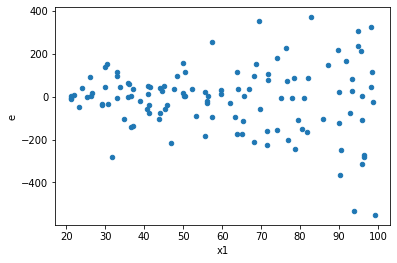

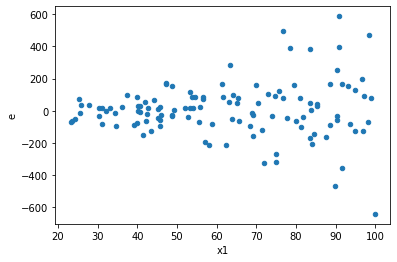

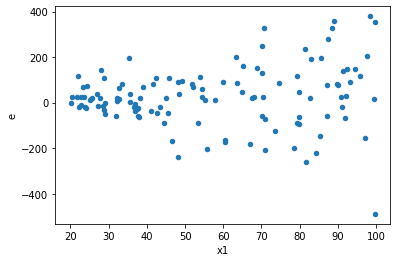

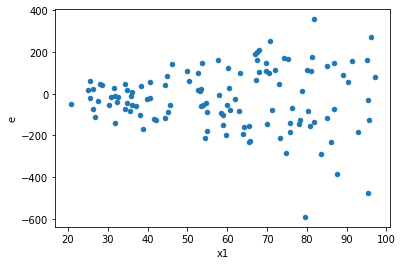

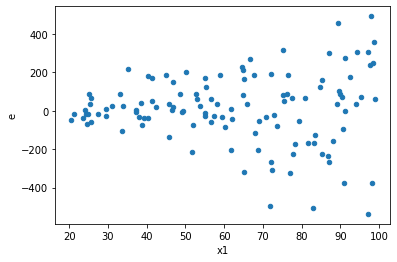

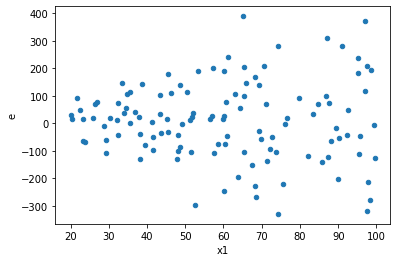

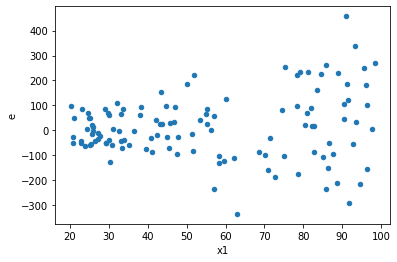

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,47.0,47.0,267040.15665969276,2687724.2329021664,5681.705460844527,57185.621976641836,10.06486914373449,6.235012506294879e-13,0.9999999999996882,3.1175062531474396e-13,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,264458.4082777061,1385132.0642709683,5626.774644206514,29470.89498448869,5.237617791363434,8.013858332489576e-08,0.9999999599307083,4.006929166244788e-08,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,345581.16803108697,2101314.409801636,7352.790809172063,44708.81722982204,6.080523489672941,6.571880595274138e-09,0.9999999967140597,3.285940297637069e-09,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,230301.2514738556,2795261.931731076,4900.026627103311,59473.658121937784,12.13741529341364,1.532107773982716e-14,0.9999999999999923,7.66053886991358e-15,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,149789.90905594005,1533916.732401949,3187.019341615746,32636.52622131806,10.240454394221558,4.4519943287468777e-13,0.9999999999997774,2.2259971643734389e-13,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,232170.29329635378,1830291.1120989632,4939.793474390506,38942.36408721199,7.88339923300475,6.406120078850108e-11,0.9999999999679694,3.203060039425054e-11,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,360020.19512045686,2660620.6584277246,7660.004151499083,56608.95017931329,7.390198368004118,2.0901058661593197e-10,0.9999999998954947,1.0450529330796599e-10,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,294300.2990881532,1414767.9150424474,6261.708491237301,30101.445000903135,4.807225542841447,3.178806744497109e-07,0.9999998410596628,1.5894033722485545e-07,Reject001=0 : Heteroscedasticity
9.0,47.0,47.0,160647.0721387028,1440884.1858998854,3418.0228114617616,30657.110338295435,8.969252702320183,5.714539952350606e-12,0.9999999999971427,2.857269976175303e-12,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,267040.15665969276,2687724.2329021664,5681.705460844527,57185.621976641836,10.06486914373449,6.235012506294879e-13,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,1880948.5448594862,201926.41086832737,40020.18180552098,4296.306614219731,0.10735350066868099,2.7775784379305486e-12,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,264458.4082777061,1385132.0642709683,5626.774644206514,29470.89498448869,5.237617791363434,8.013858332489576e-08,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,345581.16803108697,2101314.409801636,7352.790809172063,44708.81722982204,6.080523489672941,6.571880595274138e-09,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,230301.2514738556,2795261.931731076,4900.026627103311,59473.658121937784,12.13741529341364,1.532107773982716e-14,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,149789.90905594005,1533916.732401949,3187.019341615746,32636.52622131806,10.240454394221558,4.4519943287468777e-13,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,232170.29329635378,1830291.1120989632,4939.793474390506,38942.36408721199,7.88339923300475,6.406120078850108e-11,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,360020.19512045686,2660620.6584277246,7660.004151499083,56608.95017931329,7.390198368004118,2.0901058661593197e-10,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,294300.2990881532,1414767.9150424474,6261.708491237301,30101.445000903135,4.807225542841447,3.178806744497109e-07,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64